## Haberman’s data set contains data from the study conducted in University of Chicago’s Billings Hospital between year 1958 to 1970 for the patients who undergone surgery of breast cancer.

### It contains 306 datapoints/row with 4 features including class label.[](http://)

**There are 4 features.**
1. The age of person.
2. Year in which patient has gone through the surgery.
3. Nodes :-  Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels.
4. Status :- 1 = If the patients survives more than 5 years. 2 = Patients survive less than 5 years. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/haberman.csv/haberman.csv


In [2]:
haberman = pd.read_csv("../input/haberman.csv/haberman.csv")

In [3]:
# Checking the shape of dataframe to determine how many data points and feature are present. 
print (haberman.shape)

(305, 4)


In [4]:
# Looking at the column names to determine the classes of our dataframe.
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [5]:
# Checking how many data points for each class are present.
haberman["status"].value_counts()

1    225
2     80
Name: status, dtype: int64

# 1-D Scatter Plot

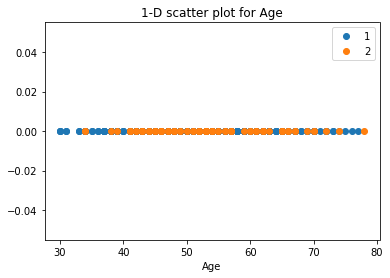

In [6]:
haber_one = haberman[haberman['status'] == 1]
haber_two = haberman[haberman['status'] == 2]
label = ['1','2']
plt.plot(haber_one["age"], np.zeros_like(haber_one["age"]), 'o')
plt.plot(haber_two["age"], np.zeros_like(haber_two["age"]), 'o')
plt.title("1-D scatter plot for Age")
plt.xlabel("Age")
plt.legend(label)
plt.show()

# 2-D Scatter Plot

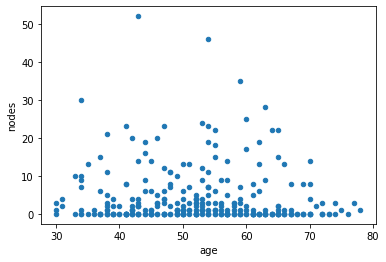

In [7]:
haberman.plot(kind='scatter', x='age', y='nodes') 
plt.show()

To determine which point of status belong to which axis in the scatter plot.
We will use the plot which color the status of survival.
2-D scatter plot with multiple color-coding.
Here 'sns' corresponds to seaborn.

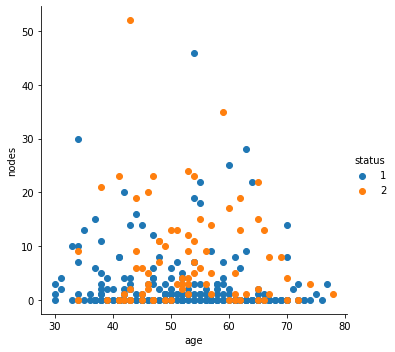

In [8]:
sns.FacetGrid(haberman, hue="status", height=5).map(plt.scatter, "age", "nodes").add_legend()
plt.show()

***Observation***

1. We cannot easily seperate the person who died within 5 years and the person who survives.
2. We could'nt even determine which points lies in which particular space in axis.
3. All the dots spread across all over the axis.
4. The data is not linearly seperable.

We cannot make sense by plotting the 2-D scatter plot. 
We always have to understand axis : labels and scale

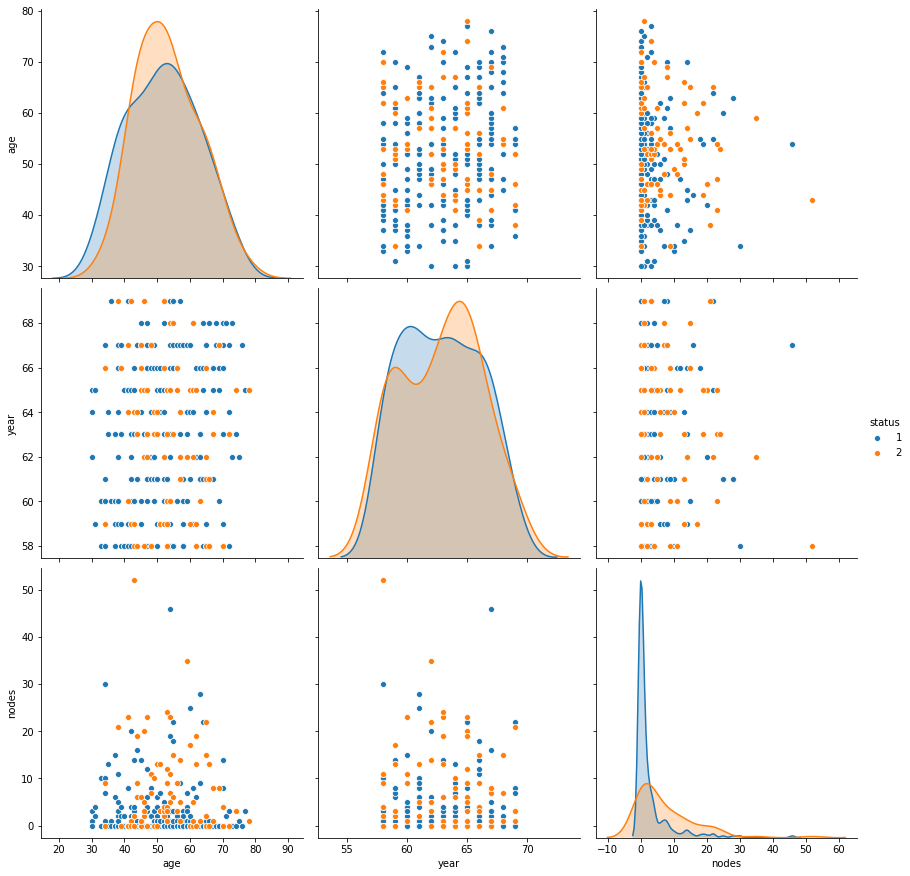

In [9]:
sns.pairplot(haberman, hue="status", height=4, vars=['age', 'year', 'nodes'])
plt.show()

This plot is not informative at all and there's so much overlapping make it impossible to classify the status.

# Histogram, PDF, CDF

## Histogram and Probability Density Function using Seaborn 

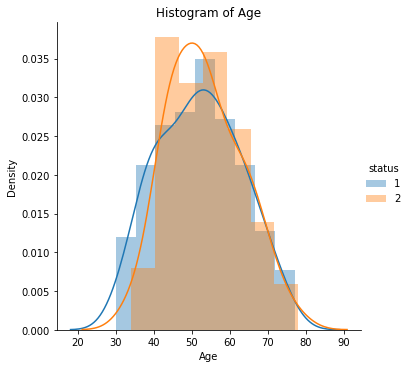

In [10]:
sns.FacetGrid(haberman, hue="status", height=5).map(sns.distplot, "age").add_legend()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

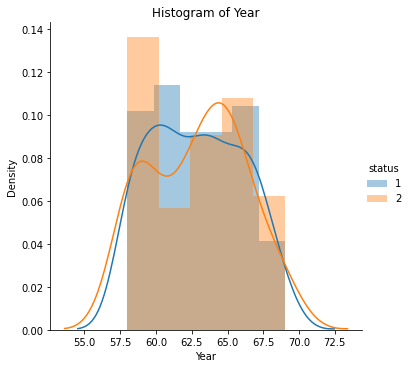

In [11]:
sns.FacetGrid(haberman, hue="status", height=5).map(sns.distplot, "year").add_legend()
plt.title('Histogram of Year')
plt.xlabel('Year')
plt.ylabel('Density')
plt.show()

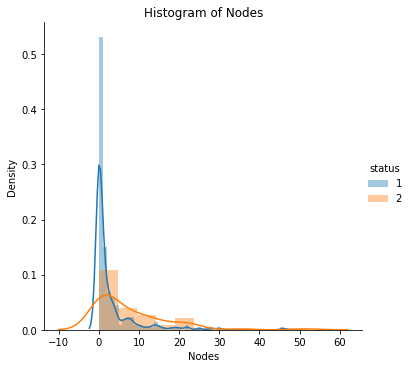

In [12]:
sns.FacetGrid(haberman, hue="status", height=5).map(sns.distplot, "nodes").add_legend()
plt.title('Histogram of Nodes')
plt.xlabel('Nodes')
plt.ylabel('Density')
plt.show()

It's still nearly impossible to classify the survival status due to all of this overlapping. But we can say that person with axlillary_lymph_node less than 8 has higher chance of surviving more than 5 years.

## Plotting Cumulative Distribution Function (CDF). So we can visually see the percentage of survival rate.

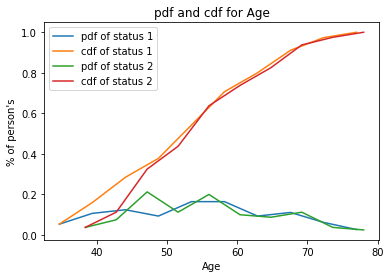

In [13]:
label = ["pdf of status 1", "cdf of status 1", "pdf of status 2", "cdf of status 2"]
counts, bin_edges = np.histogram(haber_one["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for Age")
plt.xlabel("Age")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(haber_two["age"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

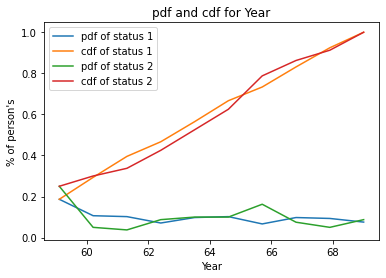

In [14]:
label = ["pdf of status 1", "cdf of status 1", "pdf of status 2", "cdf of status 2"]
counts, bin_edges = np.histogram(haber_one["year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for Year")
plt.xlabel("Year")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(haber_two["year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

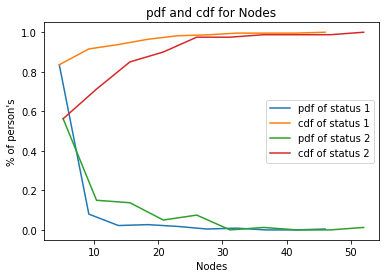

In [15]:
label = ["pdf of status 1", "cdf of status 1", "pdf of status 2", "cdf of status 2"]
counts, bin_edges = np.histogram(haber_one["nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.title("pdf and cdf for Nodes")
plt.xlabel("Nodes")
plt.ylabel("% of person's")
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(haber_two["nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(label)

plt.show()

**Observations**

There's so much overlapping in the CDF of year and we cannot classify there. It's almost on the same line till start to end. Person with the age less than 35 has all survived. Person with axlillary_lymph_node above 4-5 has not survived.

# Box plot and Whiskers

Box plot and whiskers is module to visualise 1-d scatter plot and determine the median, percentile, quartile and outliers. Seaborn has many variety of in-built data plotting module.

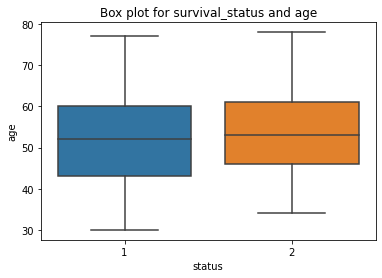

In [16]:
sns.boxplot(x='status', y='age', data=haberman).set_title("Box plot for survival_status and age")
plt.show()

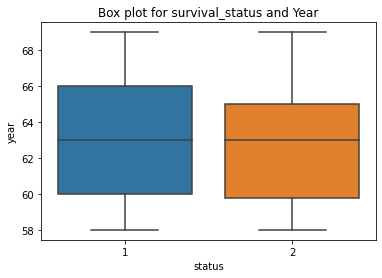

In [17]:
sns.boxplot(x='status', y='year', data=haberman).set_title("Box plot for survival_status and Year")
plt.show()

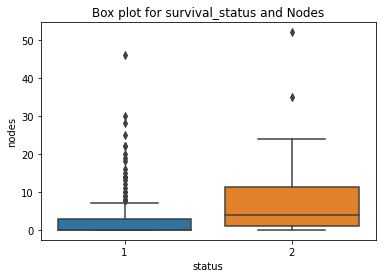

In [18]:
sns.boxplot(x='status', y='nodes', data=haberman).set_title("Box plot for survival_status and Nodes")
plt.show()

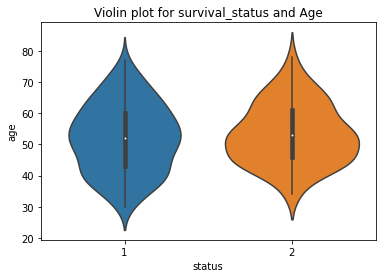

In [19]:
sns.violinplot(x='status', y='age', data=haberman).set_title("Violin plot for survival_status and Age")
plt.show()

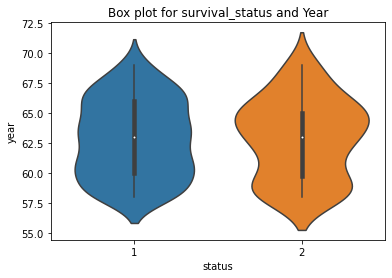

In [20]:
sns.violinplot(x='status', y='year', data=haberman).set_title("Box plot for survival_status and Year")
plt.show()

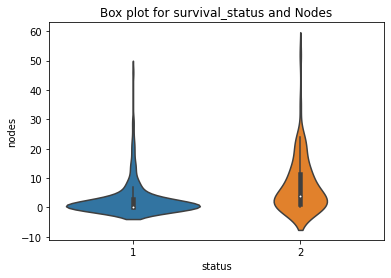

In [21]:
sns.violinplot(x='status', y='nodes', data=haberman).set_title("Box plot for survival_status and Nodes")
plt.show()

# Bivariate Analysis

Bivariate Analysis is a simplest form of statistical analysis. It's involves the analysis of 2 feature(X and Y) and derive the empirical relationship between them.

Here we use Contour Plot for Bivariate Analysis. Contour Plot geomatrically graph the 3-dimensional plot into 2-dimensional plane giving z as a contour. Z contours occurs by connecting the coordinates of X and Y. In this case it connects the PDF of X and Y and giving us Z as a contour to derive the emperical relationship between 2 features.

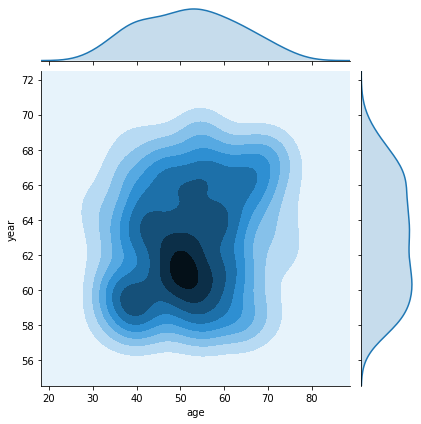

In [22]:
#2D Density plot, contours-plot
sns.jointplot(x="age", y="year", data=haber_one, kind="kde")
plt.show()

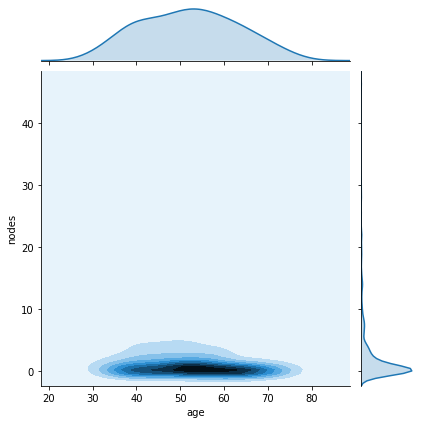

In [23]:
sns.jointplot(x="age", y="nodes", data=haber_one, kind="kde")
plt.show()

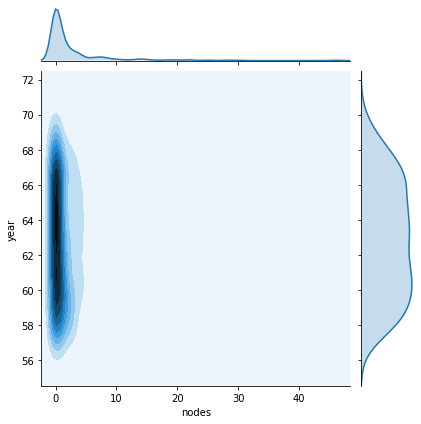

In [24]:
sns.jointplot(x="nodes", y="year", data=haber_one, kind="kde")
plt.show()

**Observations**
There's too much overlapping in 'nodes','year' and 'age','nodes' contour plot. But through the contour plot of 'age','year' we can derive that the person survives who has age of nearly 47-55 who has gone through surgery on operation year 59-63.


**Conclusion**
1. The given dataset is imbalanced with too much overlapping and the features does not contain equal numbers.
2. It's not linearly seperable so simple if-else condition won't work.
3. The axillary_lymph_node is giving us tiny bit of useful information.
4. We need to have a model which do not classifiy through if-else statements.